In [ ]:
!pip install ffmpeg

  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [ ]:
import librosa
import ffmpeg

In [ ]:

path='x.wav'
x,sr=librosa.load(path)


In [ ]:
print(x.shape,sr)

In [ ]:
import IPython.display as ipd
ipd.Audio(path)

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

In [ ]:
plt.figure(figsize=(14,5))
librosa.display.waveplot(x,sr=sr)

# Short-Time Fourier Transform

Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a single Fourier transform over an entire 10-minute song.


The **short-time Fourier transform (STFT)** (Wikipedia; FMP, p. 53) is obtained by computing the Fourier transform for successive frames in a signal.

                                        X(m,ω)=∑nx(n)w(n−m)e−jωn
 
As we increase  m , we slide the window function  w  to the right. For the resulting frame,  x(n)w(n−m) , we compute the Fourier transform. Therefore, the STFT  X  is a function of both time,  m , and frequency,  ω .

In [ ]:
X=librosa.stft(x)

For real-valued signals, the Fourier transform is symmetric about the midpoint. Therefore, librosa.stft only retains one half of the output:

In [ ]:
X.shape

This STFT has 1025 frequency bins and 13638 frames in time.

# Spectrogram

In music processing, we often only care about the spectral magnitude and not the phase content.

The **spectrogram** (Wikipedia; FMP, p. 29, 55) shows the the intensity of frequencies over time. A spectrogram is simply the squared magnitude of the STFT:

                                        S(m,ω)=|X(m,ω)|2
 
The human perception of sound intensity is logarithmic in nature. Therefore, we are often interested in the log amplitude:

In [ ]:
S = librosa.amplitude_to_db(abs(X))

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(S,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

In [ ]:
librosa.display.specshow(S,sr=sr,x_axis="time",y_axis="log")

# Creating Audio Signal

In [ ]:
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:

sr=22050 #sampling rate 220hz
T=30.0 #5 seconds 
t=np.linspace(0,T,int(T*sr),endpoint=False)
x=0.5*np.cos(2*np.pi*220*t)

In [ ]:
ipd.Audio(x,rate=sr)

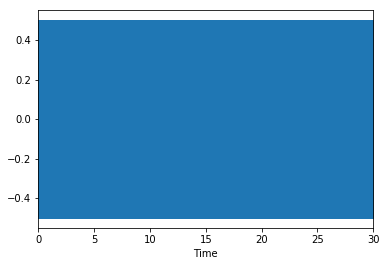

In [ ]:
librosa.display.waveplot(x,sr=sr)

# Feature Extraction

# 1. Zero Crossing Rate
The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.
This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

In [ ]:
x,sr=librosa.load('x.wav')


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(x[1000:1100])
plt.grid()

In [ ]:
zero_crossings=librosa.zero_crossings(x)
print(sum(zero_crossings))

In [ ]:
np.mean(zero_crossings)

# 2.Spectral Centroid
It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now as compared to the blues genre song which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

In [ ]:
centroid=librosa.feature.spectral_centroid(x,sr=sr)[0]

In [ ]:
centroid.shape

In [ ]:
from sklearn.preprocessing import minmax_scale
#convert into time from frames
frames=range(len(centroid))
time=librosa.frames_to_time(frames)
def normalize(x,axis=0):
    return minmax_scale(x,axis=axis)


In [ ]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(x+0.01,sr=sr,alpha=0.4)
plt.plot(time,normalize(centroid),color='r')


# Spectral Rolloff
Spectral Rolloff is the frequency below which a specified percentage of the total spectral energy,e.g.85%,lies.

In [ ]:
spectral_rolloff=librosa.feature.spectral_rolloff(x+0.01,sr=sr)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(x,sr=sr,alpha=0.4)
plt.plot(time,normalize(spectral_rolloff),color='r')

In [ ]:
import sklearn
mfccs=librosa.feature.mfcc(x,sr=sr)

librosa.display.specshow(mfccs,sr=sr,x_axis='time')


In [ ]:
librosa.display.specshow(sklearn.preprocessing.scale(mfccs,axis=1),sr=sr,x_axis='time')

# Chroma Frequencies
Chroma Frequencies are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones of the musical octave

In [ ]:
hop_length=512
chromogram=librosa.feature.chroma_stft(x,sr=sr,hop_length=hop_length)
plt.figure(figsize=(15,5))
librosa.display.specshow(chromogram,x_axis='time',y_axis='chroma',hop_length=hop_length,cmap='coolwarm')

In [ ]:
chromogram.shape

In [ ]:
hop_length=512
chromogram=librosa.feature.chroma_cqt(x,sr=sr,hop_length=hop_length)
plt.figure(figsize=(15,5))
librosa.display.specshow(chromogram,x_axis='time',y_axis='chroma',hop_length=hop_length,cmap='coolwarm')

In [ ]:
import pandas as pd
import utils
import os
import ast

In [ ]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all'),
                   ('track', 'genres_top')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                'category', categories=SUBSETS, ordered=True)

        COLUMNS = [('track', 'license'), ('artist', 'bio'),
                   ('album', 'type'), ('album', 'information')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks

In [ ]:
filepath = 'tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
tracks.head()

In [ ]:
list(tracks)

In [ ]:
import pandas as pd
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
from scipy import stats
import warnings
import seaborn as sns
import multiprocessing as mp
%matplotlib inline

In [ ]:
def columns():
    feature_sizes = dict(chroma_stft=12, chroma_cqt=12, chroma_cens=12,
                         tonnetz=6, mfcc=20, rmse=1, zcr=1,
                         spectral_centroid=1, spectral_bandwidth=1,
                         spectral_contrast=7, spectral_rolloff=1)
    moments = ('mean', 'std', 'skew', 'kurtosis', 'median', 'min', 'max')

    columns = []
    for name, size in feature_sizes.items():
        for moment in moments:
            it = ((name, moment, '{:02d}'.format(i+1)) for i in range(size))
            columns.extend(it)
    #columns.extend('genres')

    names = ('feature', 'statistics', 'number')
    columns = pd.MultiIndex.from_tuples(columns, names=names)

    # More efficient to slice if indexes are sorted.
    return columns.sort_values()

In [ ]:
def compute_features(filename,tid):

    features = pd.Series(index=columns(), dtype=np.float32,name=tid)

    # Catch warnings as exceptions (audioread leaks file descriptors).
    warnings.filterwarnings('error', module='librosa')

    def feature_stats(name, values):
        features[name, 'mean'] = np.mean(values, axis=1)
        features[name, 'std'] = np.std(values, axis=1)
        features[name, 'skew'] = stats.skew(values, axis=1)
        features[name, 'kurtosis'] = stats.kurtosis(values, axis=1)
        features[name, 'median'] = np.median(values, axis=1)
        features[name, 'min'] = np.min(values, axis=1)
        features[name, 'max'] = np.max(values, axis=1)

    try:
        
        x, sr = librosa.load(filename, sr=None, mono=True)  # kaiser_fast

        f = librosa.feature.zero_crossing_rate(x, frame_length=2048, hop_length=512)
        feature_stats('zcr', f)

        cqt = np.abs(librosa.cqt(x, sr=sr, hop_length=512, bins_per_octave=12,
                                 n_bins=7*12, tuning=None))
        assert cqt.shape[0] == 7 * 12
        assert np.ceil(len(x)/512) <= cqt.shape[1] <= np.ceil(len(x)/512)+1

        f = librosa.feature.chroma_cqt(C=cqt, n_chroma=12, n_octaves=7)
        feature_stats('chroma_cqt', f)
        f = librosa.feature.chroma_cens(C=cqt, n_chroma=12, n_octaves=7)
        feature_stats('chroma_cens', f)
        f = librosa.feature.tonnetz(chroma=f)
        feature_stats('tonnetz', f)

        del cqt
        stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
        assert stft.shape[0] == 1 + 2048 // 2
        assert np.ceil(len(x)/512) <= stft.shape[1] <= np.ceil(len(x)/512)+1
        del x

        f = librosa.feature.chroma_stft(S=stft**2, n_chroma=12)
        feature_stats('chroma_stft', f)

        f = librosa.feature.rmse(S=stft)
        feature_stats('rmse', f)

        f = librosa.feature.spectral_centroid(S=stft)
        feature_stats('spectral_centroid', f)
        f = librosa.feature.spectral_bandwidth(S=stft)
        feature_stats('spectral_bandwidth', f)
        f = librosa.feature.spectral_contrast(S=stft, n_bands=6)
        feature_stats('spectral_contrast', f)
        f = librosa.feature.spectral_rolloff(S=stft)
        feature_stats('spectral_rolloff', f)

        mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
        del stft
        f = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
        feature_stats('mfcc', f)

    except Exception as e:
        print(' {}'.format(repr(e)))

    return features

In [ ]:
def collect_result(it):
    global features
    features=features.append(it)


In [ ]:
arr=[]
genres=[]
track_id=0
pool = mp.Pool(mp.cpu_count())
features=pd.DataFrame(index=arr,columns=columns(),dtype=np.float32)
src_path='E:/genres'
genres_dict={'blues':0,'classical':1,'country':2,'disco':3,'hiphop':4,'jazz':5,'metal':6,'pop':7,'reggae':8,'rock':9}
for x,_ in genres_dict.items():
    folder=src_path + '/' + x
    for root,subdirs,files in os.walk(folder):
        for file in files:
            genres.append(x)
            filename=folder + '/' + file
            it=compute_features(filename,track_id)
            features=features.append(it)
            track_id += 1
features['genres']=genres

In [ ]:
 def save(features, ndigits):

    # Should be done already, just to be sure.
    features.sort_index(axis=0, inplace=True)
    features.sort_index(axis=1, inplace=True)

    features.to_csv('features.csv', float_format='%.{}e'.format(ndigits))

In [ ]:
save(features, 10)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
features=pd.read_csv('./gdrive/My Drive/Colab Notebooks/project/features.csv')

In [ ]:
features

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,0,-1.0809544325e+00,-5.3766208887e-01,7.6867270470e-01,4.1216008365e-02,-5.1585263014e-01,-6.9880849123e-01,-4.3465098739e-01,-8.0079191923e-01,-7.3695725203e-01,...,4.4307798147e-02,9.6230022609e-03,1.0505500250e-02,3.9023084641e+00,2.4267578125e-01,8.3044819534e-02,7.8125000000e-02,3.3203125000e-02,1.4276746511e+00,2.7693783864e-02
3,1,-8.5305190086e-01,-5.6230491400e-01,1.4363464117e+00,7.9019427299e-01,-7.2887465358e-02,-2.6752713323e-01,-6.3652062416e-01,-7.2216761112e-01,-8.5654896498e-01,...,5.5753186345e-02,1.1132154614e-02,1.2689935043e-02,9.2016677856e+00,3.2373046875e-01,5.6039810181e-02,4.7851562500e-02,6.3476562500e-03,2.3638203144e+00,3.8046307862e-02
4,2,-5.3758025169e-01,4.9117450714e+00,8.4824389219e-01,-8.5754859447e-01,-1.1979299784e+00,-1.7433324456e-01,2.2823958397e+00,5.0777542591e-01,-2.5019991398e-01,...,5.4672412574e-02,1.3048026711e-02,1.4170158654e-02,3.7734066010e+01,4.4091796875e-01,7.6291210949e-02,7.3730468750e-02,1.2695312500e-02,4.1855525970e+00,3.1730569899e-02
5,3,-6.3610190153e-01,1.0755507946e+00,-4.9994206429e-01,-7.9556709528e-01,-1.2250727415e+00,-1.0625088215e+00,6.9902127981e-01,1.7870765924e+00,7.2414398193e-01,...,8.7760165334e-02,1.4839712530e-02,1.6689218581e-02,2.0215244293e+00,1.4501953125e-01,3.3308863640e-02,3.0761718750e-02,6.3476562500e-03,1.0730284452e+00,2.0561104640e-02
6,4,1.6816316843e+00,4.1025620699e-01,-1.0453989506e+00,7.4457764626e-02,1.2425639480e-01,1.3607131243e+00,1.2917267084e+00,-9.2919909954e-01,-3.3270144463e-01,...,6.9591984153e-02,1.3983267359e-02,1.2186526321e-02,5.7065992355e+00,3.6621093750e-01,1.0146053880e-01,9.2773437500e-02,3.9550781250e-02,1.9385319948e+00,4.4205483049e-02
7,5,-3.4961903095e-01,1.0791158676e+00,3.1289860606e-01,-2.9177615047e-01,9.0747863054e-01,-9.8475342989e-01,4.8901483417e-02,-4.5966044068e-01,6.3501811028e-01,...,9.3748018146e-02,1.8948363140e-02,2.0600222051e-02,6.4031944275e+00,4.8193359375e-01,9.4041533768e-02,6.5429687500e-02,1.6113281250e-02,2.4240517616e+00,7.8950591385e-02
8,6,-6.2134993076e-01,-5.1088184118e-01,1.9587031603e+00,8.3615076542e-01,-2.3679906130e-01,-2.5597038865e-01,-6.8956112862e-01,-6.0832637548e-01,6.0171234608e-01,...,7.2378113866e-02,1.6653928906e-02,1.7165381461e-02,4.1552519798e+00,3.7548828125e-01,7.3052234948e-02,6.4941406250e-02,1.7089843750e-02,1.3782393932e+00,4.3694056571e-02
9,7,4.2582869530e-01,6.7466264963e-01,-9.4751405716e-01,1.3940595090e-01,3.7999376655e-01,2.4375639856e-01,-1.1346589029e-01,-1.6892522573e-01,7.4576252699e-01,...,1.0149403661e-01,2.0939730108e-02,1.4161375351e-02,5.5650348663e+00,2.9394531250e-01,6.1442244798e-02,4.9316406250e-02,1.0742187500e-02,2.2371547222e+00,4.2997863144e-02


In [ ]:
sns.pairplot(features.loc[:, ('mfcc', 'mean', slice('01','03'))]);
sns.pairplot(features.loc[:, ('mfcc', 'std', slice('01','03'))]);

TypeError: ignored

In [ ]:
features=features.reindex(np.random.permutation(features.index))

In [ ]:
features_data=features.reindex(np.random.permutation(features.index))

In [ ]:
X=features_data.iloc[:,0:518]
y=features_data.loc[:,'genres']

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [ ]:
import os
import keras
import h5py
import librosa
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [ ]:
data=pd.read_csv('./gdrive/My Drive/Colab Notebooks/project/features.csv')

In [ ]:
data=data.iloc[2:,1:]

In [ ]:
data=data.reindex(np.random.permutation(data.index))

In [ ]:
y=data['genres']
del data['genres']

In [ ]:
data=data.astype(float)

In [ ]:
data.columns

Index(['chroma_cens', 'chroma_cens.1', 'chroma_cens.2', 'chroma_cens.3',
       'chroma_cens.4', 'chroma_cens.5', 'chroma_cens.6', 'chroma_cens.7',
       'chroma_cens.8', 'chroma_cens.9',
       ...
       'tonnetz.39', 'tonnetz.40', 'tonnetz.41', 'zcr', 'zcr.1', 'zcr.2',
       'zcr.3', 'zcr.4', 'zcr.5', 'zcr.6'],
      dtype='object', length=518)

In [ ]:
from sklearn.preprocessing import StandardScaler

data_rescaled = StandardScaler().fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

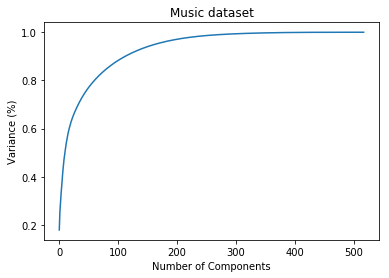

In [ ]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Music dataset')
plt.show()

In [ ]:
pca = PCA(n_components=150)
dataset = pca.fit_transform(data_rescaled)

In [ ]:
labelEncoder=LabelEncoder()
y=labelEncoder.fit_transform(y.astype(str))

In [ ]:
y

array([1, 4, 5, 3, 3, 2, 2, 1, 1, 9, 5, 2, 1, 5, 6, 5, 9, 3, 5, 9, 7, 5,
       2, 1, 3, 1, 1, 8, 2, 5, 6, 9, 8, 0, 4, 1, 9, 1, 5, 0, 7, 5, 8, 8,
       2, 1, 4, 4, 9, 1, 4, 9, 6, 6, 7, 1, 0, 7, 8, 6, 0, 9, 3, 7, 7, 3,
       4, 4, 9, 2, 8, 5, 9, 6, 4, 2, 8, 0, 5, 0, 3, 6, 4, 0, 3, 4, 0, 6,
       3, 1, 2, 6, 1, 7, 1, 0, 8, 0, 8, 4, 2, 2, 0, 7, 0, 6, 8, 2, 7, 8,
       7, 2, 9, 7, 2, 1, 8, 9, 3, 6, 3, 7, 8, 2, 8, 7, 8, 1, 4, 9, 5, 8,
       6, 2, 4, 9, 3, 3, 4, 5, 6, 7, 7, 9, 5, 8, 7, 4, 7, 0, 4, 3, 2, 2,
       1, 1, 5, 3, 0, 6, 5, 0, 9, 4, 2, 4, 4, 4, 0, 4, 9, 1, 9, 1, 5, 8,
       8, 1, 4, 6, 8, 7, 1, 8, 8, 3, 8, 6, 7, 4, 3, 8, 7, 4, 6, 6, 7, 6,
       5, 4, 8, 4, 6, 3, 5, 2, 7, 5, 0, 4, 3, 3, 0, 5, 2, 9, 1, 8, 6, 1,
       3, 7, 7, 7, 1, 3, 9, 1, 8, 8, 6, 5, 5, 8, 8, 8, 5, 0, 3, 3, 5, 2,
       2, 3, 8, 2, 2, 8, 1, 3, 4, 6, 4, 1, 0, 6, 1, 7, 3, 6, 3, 4, 1, 6,
       0, 3, 3, 8, 3, 7, 1, 4, 5, 6, 7, 6, 5, 9, 0, 2, 1, 5, 2, 8, 4, 2,
       0, 6, 4, 3, 1, 7, 7, 8, 3, 9, 0, 6, 5, 1, 5,

In [ ]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [ ]:

genre_list = ['classical','rock','country','metal','jazz','blues','hiphop','reggae','disco','pop']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(data)
pca_2d = pca.transform(data)

print(pca_2d.shape)
print(y.shape)

(1000, 518)
(1000,)


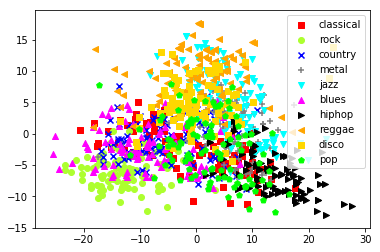

In [ ]:

colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x'],['gray','+'],['cyan','v'],['magenta','^'],['black','>'],['orange','<'],['gold','s'],['lime','p']]
for i in range(len(colormarkers)):
    px = dataset[:, 0][y == i]
    py = dataset[:, 1][y == i]
   
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])
plt.legend(genre_list)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y_binary, test_size=0.2, random_state=42, stratify = y_binary)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 150) (200, 150) (800, 10) (200, 10)


In [ ]:
X_train.columns

Index(['chroma_cens', 'chroma_cens.1', 'chroma_cens.2', 'chroma_cens.3',
       'chroma_cens.4', 'chroma_cens.5', 'chroma_cens.6', 'chroma_cens.7',
       'chroma_cens.8', 'chroma_cens.9',
       ...
       'tonnetz.39', 'tonnetz.40', 'tonnetz.41', 'zcr', 'zcr.1', 'zcr.2',
       'zcr.3', 'zcr.4', 'zcr.5', 'zcr.6'],
      dtype='object', length=518)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, input_shape=[150]),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(10,activation='softmax')
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
model = build_model()

In [ ]:
!pip install tensorboardcolab

In [ ]:
LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [ ]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://81b6fac4.ngrok.io


In [ ]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

In [ ]:
history=model.fit(X_train,y_train,epochs=40,batch_size=128,validation_data=(X_test,y_test), verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/40
800/800 [==============================] - 0s 256us/sample - loss: 2.1153 - acc: 0.2500 - val_loss: 1.6646 - val_acc: 0.4350
Epoch 2/40
800/800 [==============================] - 0s 43us/sample - loss: 1.4494 - acc: 0.5362 - val_loss: 1.3901 - val_acc: 0.5650
Epoch 3/40
800/800 [==============================] - 0s 41us/sample - loss: 1.0938 - acc: 0.7038 - val_loss: 1.2105 - val_acc: 0.6150
Epoch 4/40
800/800 [==============================] - 0s 42us/sample - loss: 0.8436 - acc: 0.7875 - val_loss: 1.0234 - val_acc: 0.6750
Epoch 5/40
800/800 [==============================] - 0s 41us/sample - loss: 0.6517 - acc: 0.8350 - val_loss: 1.0220 - val_acc: 0.7000
Epoch 6/40
800/800 [==============================] - 0s 39us/sample - loss: 0.5229 - acc: 0.8700 - val_loss: 0.8856 - val_acc: 0.7250
Epoch 7/40
800/800 [==============================] - 0s 45us/sample - loss: 0.4034 - acc: 0.9187 - val_loss: 0.8130 - val_acc: 0.7450
Epoch 8/

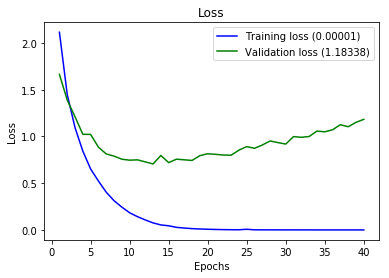

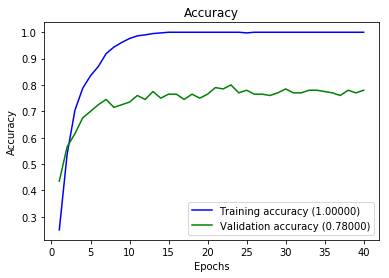

In [ ]:
plot_history(history)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

seed = 1000

Accuracy : 0.78

Classification Report
              precision    recall  f1-score   support

           0    0.94444   0.85000   0.89474        20
           1    0.94444   0.85000   0.89474        20
           2    0.69565   0.80000   0.74419        20
           3    0.65000   0.65000   0.65000        20
           4    0.69565   0.80000   0.74419        20
           5    0.90476   0.95000   0.92683        20
           6    0.82609   0.95000   0.88372        20
           7    0.82353   0.70000   0.75676        20
           8    0.73684   0.70000   0.71795        20
           9    0.61111   0.55000   0.57895        20

   micro avg    0.78000   0.78000   0.78000       200
   macro avg    0.78325   0.78000   0.77920       200
weighted avg    0.78325   0.78000   0.77920       200

[[17  0  0  0  1  0  0  0  0  2]
 [ 0 17  0  1  0  2  0  0  0  0]
 [ 0  0 16  1  0  0  0  1  0  2]
 [ 1  0  1 13  2  0  1  1  0  1]
 [ 0  0  0  2 16  0  0  1  1  0]
 [ 0  1  0  0  0 19  0  0  0  0]
 [ 0

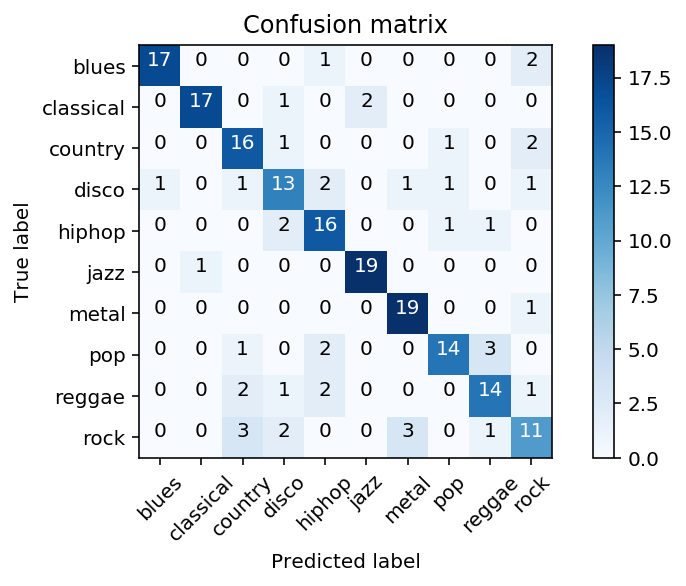

In [ ]:
full_multiclass_report(model,
                       X_test,
                       y_test,
                       labelEncoder.inverse_transform(np.arange(10)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 69.00%


In [ ]:
opt = Adam()

batch_size = 35
nb_epochs = 400
input_shape = (518)
print('Build CNN model ...')
model = Sequential()
model.add(Dense(units=128,activation='relu',input_shape=[518]))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10, activation='softmax'))

print("Compiling ...")
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

print("Training ...")
model.fit(X_train,y_train, batch_size=batch_size, epochs=nb_epochs)

print("\nTesting ...")
score, accuracy = model.evaluate(X_test,y_test, batch_size=batch_size, verbose=1)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)

Build CNN model ...
Compiling ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               66432     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 70,890
Trainable params: 70,890
Non-trainable params: 0
_________________________________________________________________
Training ...
Epoch 1/400
700/700 [==============================] - 1s 916us/step - loss: 14.4937 - acc: 0.1000
Epoch 2/400
700/700 [==============================] - 0s 121us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/400
700/700 [==============================] - 0s 121us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/400
700/700 [==============================] - 0s 

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
#fit (train) the classifier

clf.fit(X_train,y_train)
#print the learned coeficients

print(clf.coef_)
print(clf.intercept_)

[[   3.65654962  -84.3061789  -109.52012402 ...   37.02795065
    14.0141828    25.62747559]
 [ -56.37946983  -88.58652312   75.62075624 ...   -5.85967685
     8.74900419   31.79417428]
 [ -33.19931906   -7.94644351    0.35971795 ...    5.95335669
    72.04711655  -63.25788877]
 ...
 [  23.43898037   74.46814816   50.28989333 ...  -25.4822801
    -4.33796306  -15.40522119]
 [ -34.36514988   56.62827193  -23.81809902 ...  -39.75800202
     8.74915354  -22.8571973 ]
 [  -2.81996482  -54.17912514  -41.10355999 ...   28.33999338
   -42.38478283  -30.47086885]]
[-1421.92942236 -1227.49307181 -1263.299205   -1278.24353308
 -1353.90831822 -1419.44991382 -1399.93732955 -1358.18836015
 -1302.74410689 -1275.27481102]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [ ]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train,y_train_pred))

0.89625


In [ ]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.74


In [ ]:
from matplotlib import pylab
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0  1  0  1  0  0  1  2]
 [ 0 19  0  0  0  0  0  0  0  1]
 [ 0  0 14  1  0  1  2  0  0  2]
 [ 1  0  2 11  1  0  1  0  0  4]
 [ 0  0  0  0 16  0  1  1  2  0]
 [ 0  2  1  0  0 16  1  0  0  0]
 [ 0  0  0  0  1  0 19  0  0  0]
 [ 0  0  0  1  1  0  0 18  0  0]
 [ 0  0  0  2  4  0  0  0 13  1]
 [ 1  0  3  3  0  0  5  1  0  7]]


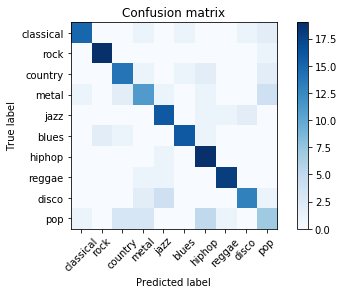

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(genre_list))
    plt.xticks(tick_marks, genre_list, rotation=45)
    plt.yticks(tick_marks, genre_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cm)

In [ ]:

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset, y, test_size=0.25, random_state=1)

scaler = StandardScaler().fit(X_train1)
X_train1 = scaler.transform(X_train1)

X_test1 = scaler.transform(X_test1)


# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train1, y_train1)


from sklearn import metrics
y_train_pred1 = clf.predict(X_train1)
print(metrics.accuracy_score(y_train1, y_train_pred1))

y_pred1 = clf.predict(X_test1)
print(metrics.accuracy_score(y_test1, y_pred1))

0.9693333333333334
0.664


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [ ]:
from sklearn import svm

C = 1 # SVM regularization parameter
clf = svm.LinearSVC(C=C)


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
train_acc = metrics.accuracy_score(y_train,clf.predict(X_train))

print(train_acc)
print(metrics.accuracy_score(y_test,y_pred))

0.99875
0.66


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
def learn_result(X_train,y_train,X_test,y_test,Classifier):
    if Classifier == "SGD":
        from sklearn.linear_model import SGDClassifier
        clf = SGDClassifier()
    if Classifier == "KNN":
        from sklearn.neighbors import KNeighborsClassifier
        clf = KNeighborsClassifier()
    if Classifier == "SVM":
        from sklearn import svm
        clf = svm.LinearSVC()
    if Classifier == "RF":
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier(n_estimators=10)
    if Classifier == "GNB":
        from sklearn.naive_bayes import GaussianNB
        clf = GaussianNB()

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_acc = metrics.accuracy_score(y_train,clf.predict(X_train))
    test_acc = metrics.accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm)
    return train_acc,test_acc,y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[92.62, 77.62, 99.75, 99.12, 79.5]
[75.0, 58.0, 67.0, 41.0, 62.0]


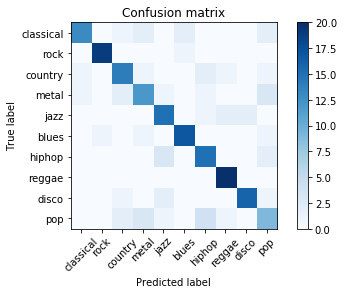

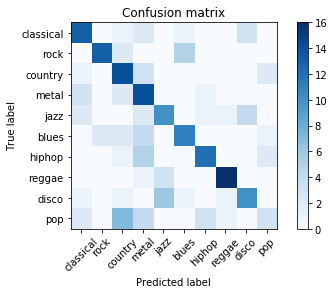

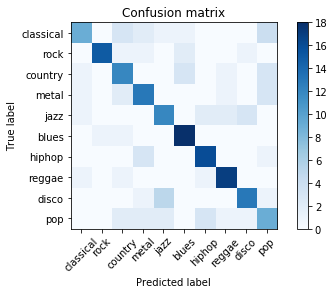

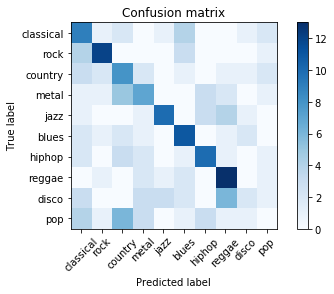

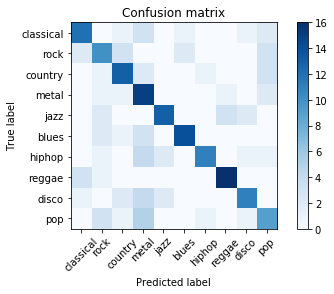

In [ ]:
Classifiers = ["SGD","KNN","SVM","RF","GNB"]
train_accs = []
test_accs = []

for Classifier in Classifiers:
	train_acc,test_acc,_ = learn_result(X_train,y_train,X_test,y_test,Classifier)
	train_acc_perc = round(train_acc*100,2)
	test_acc_perc = round(test_acc*100,2)
	train_accs.append(train_acc_perc)
	test_accs.append(test_acc_perc)
    
print(train_accs)
print(test_accs)

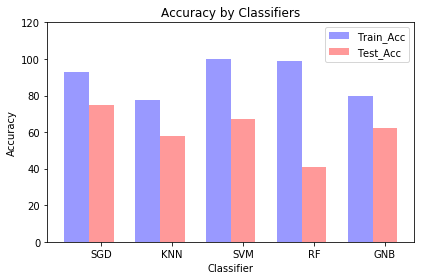

In [ ]:

%matplotlib inline


import numpy as np  
import matplotlib.pyplot as plt  

n_groups = len(Classifiers) 

fig, ax = plt.subplots()  
index = np.arange(n_groups)  
bar_width = 0.35  
   
opacity = 0.4  
rects1 = plt.bar(index, train_accs, bar_width,alpha=opacity, color='b',label= 'Train_Acc')  
rects2 = plt.bar(index + bar_width, test_accs, bar_width,alpha=opacity,color='r',label='Test_Acc')  
   
plt.xlabel('Classifier')  
plt.ylabel('Accuracy')  
plt.title('Accuracy by Classifiers')  
plt.xticks(index + bar_width, ("SGD","KNN","SVM","RF","GNB"))  
plt.ylim(0,120)  
plt.legend()  
   
plt.tight_layout()  
plt.show()

In [ ]:
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
# Be sure training samples are shuffled.
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 72.00%


In [ ]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=10)

# Fitting Model
model.fit(X_train)
#all_predictions = model.predict(X_train)
train_acc = metrics.accuracy_score(y_train,clf.predict(X_train))
print(train_acc)
y_pred=model.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.99125
0.085


In [ ]:
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
# Be sure training samples are shuffled.
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
clf = skl.svm.SVC(kernel='poly',degree=1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 75.50%


In [ ]:
from sklearn.model_selection import train_test_split

# 50% training set, 20% validation set, 30% test set
#x_train, x_tmp, y_train, y_tmp = train_test_split(, y, test_size=0.5, random_state=42)
x_validate, x_test, y_validate, y_test1 = train_test_split(X_test,y_test, test_size=0.4, random_state=42)
c = [10**(-3), 10**(- 2), 10**(- 1), 10**0, 10**1, 10**2, 10**3]  # possible values of C
g = [10**(-9), 10**(-7), 10**(-5), 10**(-3)]  # possible values of gamma

clf = svm.SVC(kernel='rbf', C=c[2], gamma=g[1])  # for example
clf.fit(X_train, y_train)  
full_prediction = clf.predict(x_validate)

print('[-] Number of mislabeled points out of a total %d points: %d'
      % (len(y_validate), (y_validate != full_prediction).sum()))
succ_rate = (100 * (len(y_validate) - (y_validate != full_prediction).sum())) / len(y_validate)
print('[-] With am accuracy of %.3f%s'
      % (succ_rate, '%'))

[-] Number of mislabeled points out of a total 120 points: 36
[-] With am accuracy of 70.000%


In [ ]:
clf = svm.SVC(kernel='rbf', C=c[3], gamma=g[2])
clf.fit(X_train, y_train)

full_prediction = clf.predict(x_test)

print('[-] Number of mislabeled points out of a total %d points: %d'
      % (len(y_test1), (y_test1 != full_prediction).sum()))
print('[-] With a success rate of %.3f%s'
      % ((100 * (len(y_test1) - (y_test1 != full_prediction).sum())) / len(y_test), '%'))

[-] Number of mislabeled points out of a total 80 points: 22
[-] With a success rate of 29.000%


In [ ]:
test_acc

0.62

In [ ]:
test_accs

[75.0, 58.0, 67.0, 41.0, 62.0]